# defining a database

Here we aim at defining a database of faces which are looking either at the left, to the centre or to the right of the screen. This will be used for further supervised learning.


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## a minimalistic stimulation within the notebook


Instead of using an external program to show stimuli, we will use a minimalist solution within the notebook. This will consist of chains of characters that we really display into segments:

In [2]:
targets = {}
s_target = '🔴'
s_distra = '🔵'
s_target_bis = '🔵'

s_distra = '🌫'

N_dis = 24
N_margin = 2

targets['left'] = N_margin * s_distra + s_target + 2 * N_dis * s_distra + N_margin * s_distra

targets['center'] = N_margin * s_distra + N_dis * s_distra + s_target + N_dis * s_distra + N_margin * s_distra

targets['right'] = N_margin * s_distra + 2 * N_dis * s_distra + s_target + N_margin * s_distra

print ('Empty line')
null = N_margin * s_distra +  (2 * N_dis + 1) * s_distra + N_margin * s_distra
print (null)
print ('Fixation dot')
center = N_margin * s_distra + N_dis * s_distra + s_target_bis + N_dis * s_distra + N_margin * s_distra
print (center)

for label in targets.keys():
    print('label=', label)
    print (targets[label])

Empty line
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Fixation dot
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= left
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= center
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= right
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫


Let's now use a trick in jupyter notebooks to show then hide a text area:
https://stackoverflow.com/questions/42782902/clear-widget-area-of-a-cell-in-a-jupyter-notebook-from-within-notebook


In [3]:
import time

from IPython.display import clear_output
for i in range(10)[::-1]:
    clear_output()
    if i>0:
        if i % 2 :
            print('⌛️Countdown', i)
        else:
            print('⏳Countdown', i)

    else:
        print('🚀 Lift-off !')
    time.sleep(1)

🚀 Lift-off !


We will now draw a random sequence of left, center and right:

In [4]:
import numpy as np
for i in range(25):

    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print('i_choice', i_choice, ', label', label)


i_choice 1 , label center
i_choice 1 , label center
i_choice 0 , label left
i_choice 2 , label right
i_choice 2 , label right
i_choice 2 , label right
i_choice 1 , label center
i_choice 0 , label left
i_choice 0 , label left
i_choice 1 , label center
i_choice 2 , label right
i_choice 0 , label left
i_choice 1 , label center
i_choice 2 , label right
i_choice 2 , label right
i_choice 1 , label center
i_choice 1 , label center
i_choice 2 , label right
i_choice 0 , label left
i_choice 0 , label left
i_choice 1 , label center
i_choice 0 , label left
i_choice 2 , label right
i_choice 0 , label left
i_choice 1 , label center


Finally, this implements a minimalistic stimulation software in a few lines of code:

In [5]:
N_frame = 10
for i in range(N_frame):
    clear_output()
    #print('frame', i, '/', N_frame)
    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print(null)
    print(targets[label])
    print(null)

    time.sleep(1)


🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫


## detect the upper half face : full frame from the webcam

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

First, if you have not done so already, install ``LeCheapEyeTracker`` (you will need ``opencv`` installed too). This is what I use:

Let's grab a full frame:

In [6]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()

H, W, three = img0.shape
movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)

for i in range(N_frame):                
    print('frame', i)
    movie[:, :, :, i] = et.cam.grab()
    time.sleep(0.3)
    
img = et.cam.grab()
et.close()


/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml
Time 1022462.343808128
frame 0
frame 1
frame 2
frame 3
Capture released


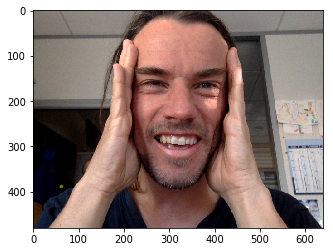

In [7]:
plt.imshow(movie[:, :, ::-1, 0])

This is just a bunch of pixels:

In [8]:
movie[100, 307, :, 0]

array([126, 137, 209], dtype=uint8)

## detect the upper half face

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

The library, will detect the face's position and crop the upper half:

In [9]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()
img_face, res, t0 = et.process_frame(img0, et.clock())

H, W, three = img_face.shape
for i in range(N_frame):
    print('frame', i)

    frame = et.cam.grab()
    img_face, res, t0 = et.process_frame(frame, et.clock())
    time.sleep(0.3)
    
et.close()


Time 1022466.272428987
frame 0
frame 1
frame 2
frame 3
Capture released


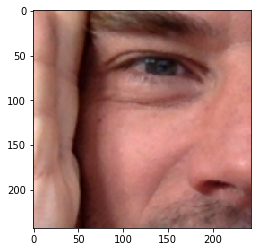

In [10]:
plt.imshow(img_face[:, :, ::-1])

## saving the frames to image files

We first create the folder hierarchy:

In [11]:
datapath = '/tmp/dataset'
import os
try:
    os.mkdir(datapath)
except:
    pass

for label in targets.keys():
    print('label=', label)    
    try:
        os.mkdir(os.path.join(datapath, label))
    except:
        pass


label= left
label= center
label= right


In [12]:
!ls -lR {datapath}

total 0
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 22 09:27 center
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 22 09:27 left
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 22 09:27 right

/tmp/dataset/center:

/tmp/dataset/left:

/tmp/dataset/right:


Then use the excellent https://imageio.github.io library:

In [13]:
import imageio
print(movie[:, :, :, 0].shape)
imageio.imwrite('/tmp/screenshot.png', movie[:, :, :, 0])

(480, 640, 3)


In [14]:
subject_name='anonymous'
N_frame = 64
for i in range(N_frame):
    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print(targets[label])

    filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
    print(filename)



🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_0.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_1.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
/tmp/dataset/right/anonymous_2.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/center/anonymous_3.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/center/anonymous_4.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_5.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_6.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
/tmp/dataset/right/anonymous_7.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_8.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_9.png
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
/tmp/dataset/left/anonymous_10.png
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫

## wrapping things up

All the protocol in one script:

In [15]:
datapath = '/tmp/dataset'
datapath = '../../anaisbrgs_StageL3/dataset'



In [16]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client


def get_stack(datapath=datapath, subject_name='anonymous', N_frame=64, startup_time=1., interframe_time=1., waiting_time=.2):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())

        H, W, three = img_face.shape
        #movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)
        for i in range(N_frame):
            
            clear_output()
            # presentation of stimulus
            i_choice = np.random.randint(3)
            label = list(targets.keys())[i_choice]
            print(null)
            print(null)
            print(targets[label])
            print(null)
            print(null)

            time.sleep(interframe_time)

            frame = et.cam.grab()
            img_face, res, t0 = et.process_frame(frame, et.clock())

            clear_output()
            print(null)
            print(null)
            print(center)
            print(null)
            print(null)

            
            time.sleep(waiting_time)

            filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
            imageio.imwrite(filename, img_face[:, :, ::-1])

    finally:
        et.close()
    return movie

In [17]:
date = '2018-03-22_'

In [18]:
movie = get_stack(subject_name=date + 'Laurent')

🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Capture released


In [19]:
!ls -lR {datapath}

total 0
drwxr-xr-x    6 laurentperrinet  wheel   192 Mar 20 15:09 blink
drwxr-xr-x  109 laurentperrinet  wheel  3488 Mar 22 09:40 center
drwxr-xr-x  116 laurentperrinet  wheel  3712 Mar 22 09:40 left
drwxr-xr-x  101 laurentperrinet  wheel  3232 Mar 22 09:40 right

../../anaisbrgs_StageL3/dataset/blink:
total 360
-rw-r--r--  1 laurentperrinet  wheel  57834 Mar 20 15:07 Anaïs_15.png
-rw-r--r--  1 laurentperrinet  wheel  58192 Mar 20 15:07 Anaïs_19.png
-rw-r--r--  1 laurentperrinet  wheel  59505 Mar 20 15:01 Laurent_53.png

../../anaisbrgs_StageL3/dataset/center:
total 12952
-rw-r--r--  1 laurentperrinet  wheel  61445 Mar 20 17:08 2018-03-20_Justine_0.png
-rw-r--r--  1 laurentperrinet  wheel  63830 Mar 20 17:08 2018-03-20_Justine_1.png
-rw-r--r--  1 laurentperrinet  wheel  62251 Mar 20 17:08 2018-03-20_Justine_15.png
-rw-r--r--  1 laurentperrinet  wheel  61309 Mar 20 17:08 2018-03-20_Justine_16.png
-rw-r--r--  1 laurentperrinet  wheel  61950 Mar 20 17:08 2018-03-20_Justine_18.png
-rw-r--r